In the last year people noticed that Google stock performed much higher than nasdaq index and the reason is obvouied to the instors today which is because of the high growth that google achieved, since then I tried to analyze the stock and build a machine learning model to predict and compare the values, for building the model I noticed that we have large dataset and we could use deep learning for that, so the most obvouis choise is Recurrent neural networks (please see the following link [https://www.youtube.com/watch?v=6niqTuYFZLQ](#cell-id)) which is bascally update the wwights be saving the current state and feed it again to the hidden layer chick the figure bellow:
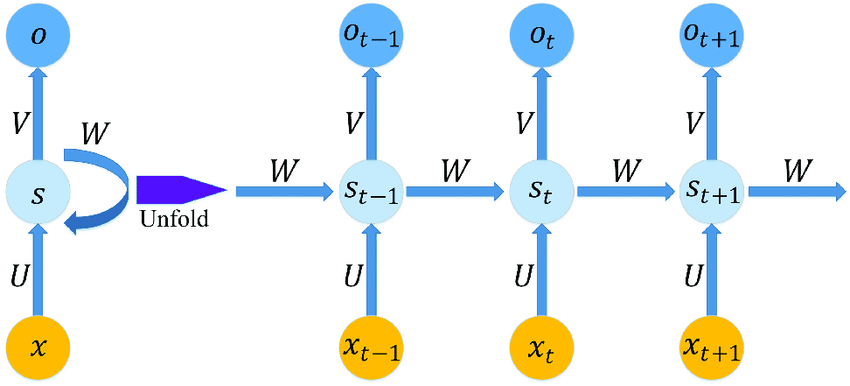

And to be specific I used Long short-term memory (LSTM) algorithm which uses the following equations to update the weights and the values of the stock prices of Recurrent neural networks:
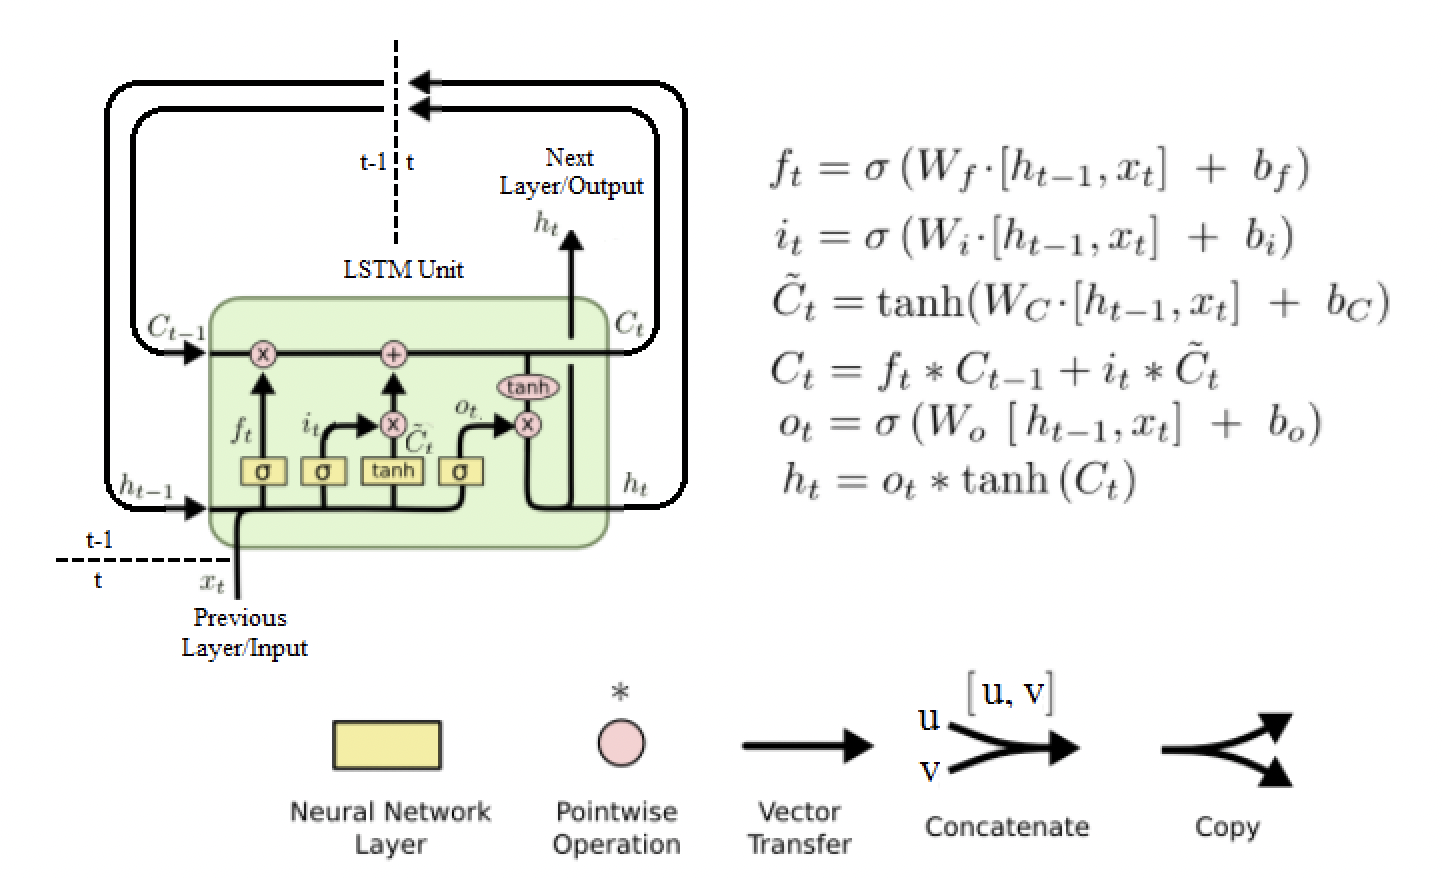



In [1]:
import pandas_datareader as web # to read data from web
import pandas as pd
import numpy as np

In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 9.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf

# Set the start and end date
start_date = '2010-01-01'
end_date = '2022-02-15'

# Set the ticker
ticker = 'GOOGL'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-08,2780.530029,2800.000000,2740.280029,2787.979980,2787.979980,2714200
2022-02-09,2819.270020,2850.489990,2803.739990,2831.840088,2831.840088,2007200
2022-02-10,2794.070068,2829.689941,2759.139893,2772.399902,2772.399902,1966500
2022-02-11,2772.000000,2783.129883,2668.000000,2685.649902,2685.649902,1994200
2022-02-14,2665.129883,2726.000000,2665.129883,2710.520020,2710.520020,1715100


In [4]:
data.shape


(3051, 6)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Text(0.5, 1.0, 'Closing price History')

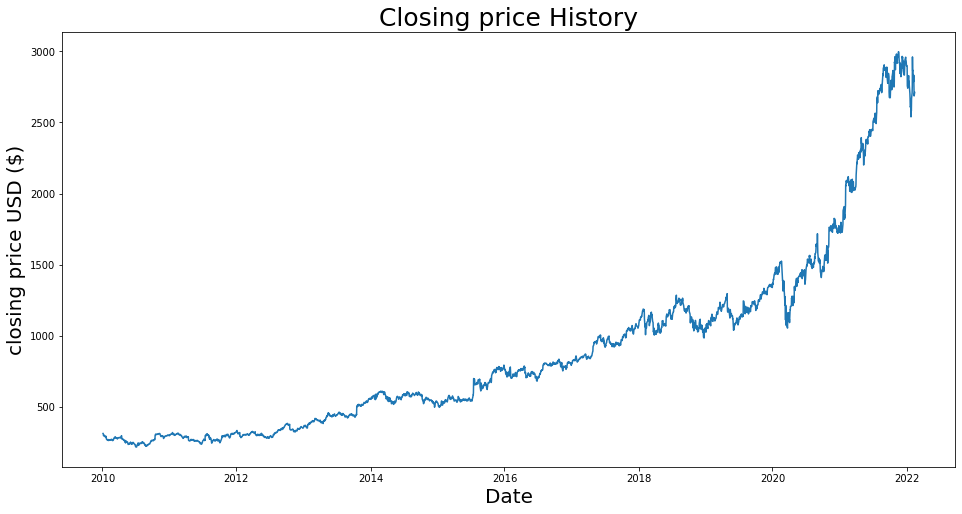

In [6]:
#lets look at the stock closing price of history
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
sns.lineplot(x= data.index,y=data['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('closing price USD ($)',fontsize=20)
plt.title('Closing price History',fontsize=25)

In [7]:
# Split into train and test:
train_csv = data[:2745]
test_csv = data[2745:]

In [8]:
#Now, we can save the 2 csv files, Train and Test.
train_csv.to_csv('train_data.csv')
test_csv.to_csv('test_data.csv')

In [9]:
Google_data= data.iloc[: , 3:4]
Google_data.head()

,Close
Date,
2010-01-04,313.688690
2010-01-05,312.307312
2010-01-06,304.434448
2010-01-07,297.347351
2010-01-08,301.311310


In [10]:
## We want to create a numpy arrary not a vector 
trainig_set= Google_data.iloc[:2745,:].values

In [11]:
test_set= Google_data.iloc[2745:,:].values

In [12]:
# Feature scalling, Here we will do normalizatioin 
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
trainig_set_scaled= sc.fit_transform(trainig_set)

In [13]:
X_train=[] 
y_train= [] 
# adding the past 60 days
for i in range(60,2745):
    X_train.append(trainig_set_scaled[i-60:i,0]) 
    y_train.append(trainig_set_scaled[i,0])
    
X_train, y_train= np.array(X_train), np.array(y_train)

In [14]:
X_train.shape, y_train.shape

((2685, 60), (2685,))

In [15]:
#Since LTSM need 3 dimensional types we will reshape the X_train 
X_train= np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(2685, 60, 1)

Now we are Going to use the following equation to calculate the right neurons number 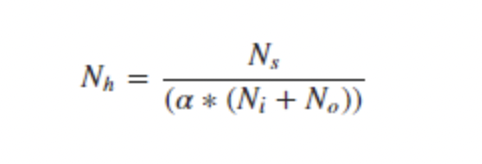

As we now, too many hidden layers will cause an overfitting, so we need to be careful about that.
The number of hidden layers that we are going to build for hidden layers will be more than 2/3 layers of the input layer plus the output layer and less than 2 * Number of input layers.

In [16]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#  Initialising the RNN
model= Sequential()

# Now we are starting to create the LSTM neural netwroks with dropout to reduce the overfitting
model.add(LSTM(units=100,return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=80,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=80,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=80,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=80))
model.add(Dropout(rate=0.2))

# The output layer
model.add(Dense(units=1))

# Since our problem is a regression we will use Mean Squared error (MSE)
model.compile(loss='mean_squared_error', optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 80)            57920     
                                                                 
 dropout_1 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            51520     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 60, 80)            5

In [18]:
# Now We are ready to traing the model 
history=model.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
84/84 [==============================] - 39s 253ms/step - loss: 0.0117
Epoch 2/50
84/84 [==============================] - 18s 211ms/step - loss: 0.0023
Epoch 3/50
84/84 [==============================] - 18s 211ms/step - loss: 0.0020
Epoch 4/50
84/84 [==============================] - 18s 210ms/step - loss: 0.0022
Epoch 5/50
84/84 [==============================] - 17s 208ms/step - loss: 0.0018
Epoch 6/50
84/84 [==============================] - 18s 215ms/step - loss: 0.0020
Epoch 7/50
84/84 [==============================] - 18s 209ms/step - loss: 0.0016
Epoch 8/50
84/84 [==============================] - 18s 210ms/step - loss: 0.0015
Epoch 9/50
84/84 [==============================] - 18s 212ms/step - loss: 0.0018
Epoch 10/50
84/84 [==============================] - 19s 226ms/step - loss: 0.0016
Epoch 11/50
84/84 [==============================] - 18s 216ms/step - loss: 0.0014
Epoch 12/50
84/84 [==============================] - 18s 212ms/step - loss: 0.0012
Epoch 13/50
8

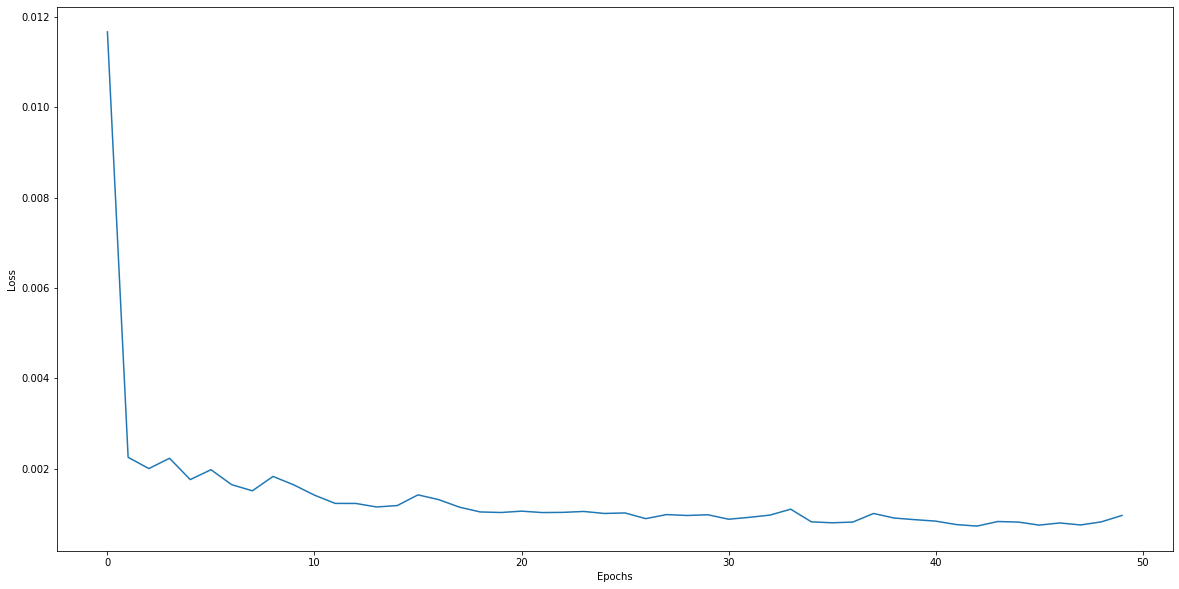

In [19]:
# Plotting the loss
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [20]:

train_data= pd.read_csv('train_data.csv')
test_data= pd.read_csv('test_data.csv')

In [21]:
real_stock_price = test_data.iloc[:, 3:4].values

In [22]:
real_stock_price.shape

(306, 1)

In [23]:
test_set.shape

(306, 1)

In [24]:
# Now concatenating and scalling the dataset
data_total= pd.concat([train_data['Close'], test_data['Close']],  axis=0)
inputs= data_total[len(data_total)-len(test_data)-60:].values 
inputs = inputs.reshape(-1,1) 
inputs = sc.transform(inputs)

X_test = []
#60 is the last 60 and z-60 = 306(the test), so z = 366
for i in range(60, 366):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# Same as what we did in the trainging, we will reshape the X_test
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
inputs.shape

(366, 1)

In [26]:
data_total.shape

(3051,)

In [27]:
X_test.shape

(306, 60, 1)

In [28]:
# Now predicting the price
predicted_stock_price = model.predict(X_test)

In [29]:
# Inversing 
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

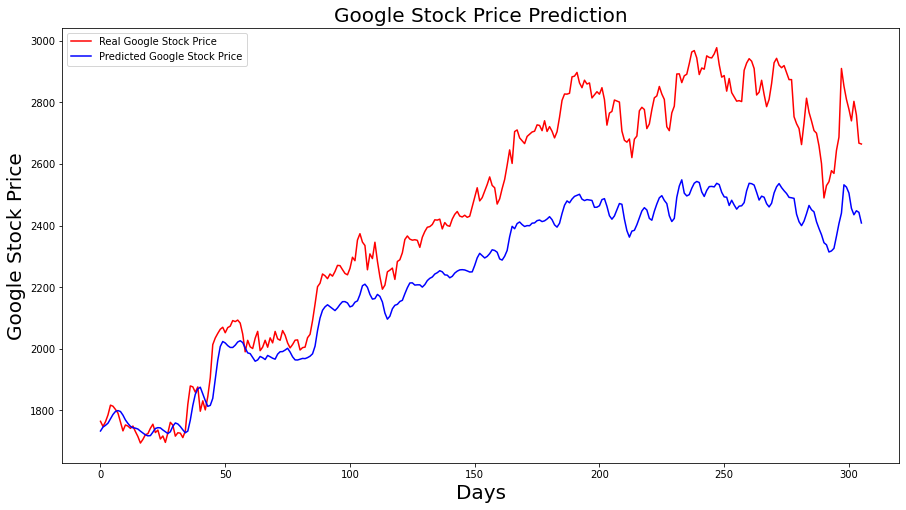

In [30]:
# Visualising the results of the last 366 day
plt.figure(figsize=(15,8))
plt.plot(real_stock_price, color='Red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction',fontsize=20)
plt.xlabel('Days', fontsize=20)
plt.ylabel('Google Stock Price',fontsize=20)
plt.legend()
plt.show()

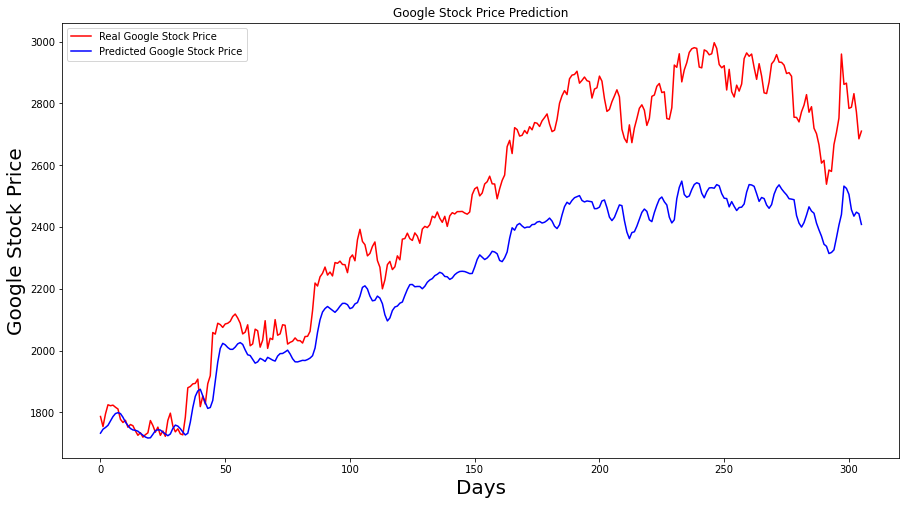

In [31]:
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(test_set, color='Red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='Blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Google Stock Price', fontsize=20)
plt.legend()
plt.show()